1)

¿Cuál es mejor a nivel R2?

Regresión lineal, Polinomica 2 o polinomica 3

Gráficas de calibración de cada una y realiza cross validation  (random_state = 42, prueba = 20%) 

 

In [117]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures


from matplotlib import pyplot as plt



df = pd.read_csv('day.csv')

In [118]:
df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [119]:
df[['casual', 'cnt']].corr()

,casual,cnt
casual,1.000000,0.672804
cnt,0.672804,1.000000


In [120]:
df.drop(['casual', 'registered', 'instant', 'dteday', 'mnth', 'yr'], axis=1, inplace=True)


In [121]:
categorical_features = ['season', 'weathersit', 'weekday']


In [122]:
df = pd.get_dummies(df, columns=categorical_features)


## Regresión Lineal 

In [123]:
X = df.drop('cnt', axis=1)
y = df['cnt']

In [124]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo con interacciones
model = linear_model.LinearRegression().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_lineal = model.predict(X_test)
print('R^2 : ',r2_score(y_pred=predicciones_lineal, y_true=y_test))


R^2 :  0.5562077099859047


In [125]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones': predicciones,
        'y': y
    })
    
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False) + 1
    gropuped = df_calibracion.groupby('bins').mean()
    
    plt.plot(gropuped.predicciones, gropuped.y, label="Modelo", marker="o")
    plt.plot(gropuped.predicciones, gropuped.predicciones, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("Prediccion")
    plt.ylabel("Real")

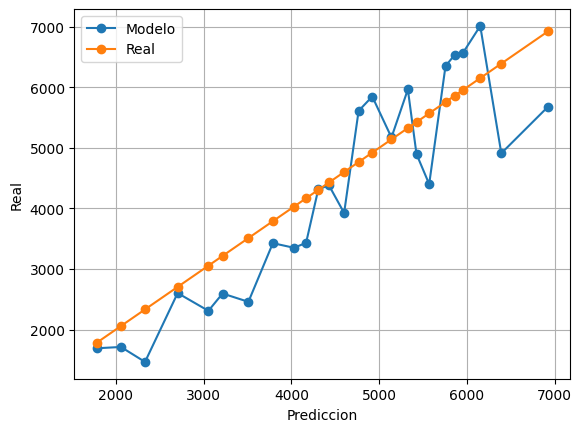

In [126]:
calibracion(predicciones_lineal, y_test, 25)

### Polinomica 2

In [127]:
degree = 2

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly2 = model.predict(X_test)
print('R^2 : ',r2_score(y_pred=predicciones_poly2, y_true=y_test))


R^2 :  0.5653434988020116


c:\Users\ppmel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.816e+06, tolerance: 2.141e+05
  model = cd_fast.enet_coordinate_descent(


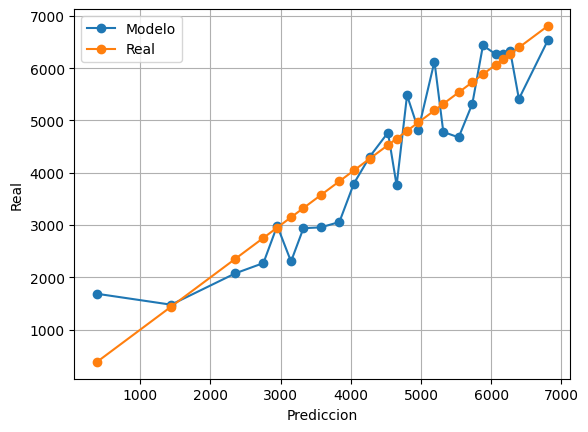

In [128]:
calibracion(predicciones_poly2, y_test, 25)

## Polinomica 3

In [129]:
degree = 3

# Aplicar StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Features polinomiales
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

# Crossvalidation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión Lasso o ridge 
model = linear_model.Lasso().fit(X_train, y_train)

# Predicciones y r2, cuida el nombre de la prediccion 
predicciones_poly3 = model.predict(X_test)
print('R^2 : ',r2_score(y_pred=predicciones_poly3, y_true=y_test))


R^2 :  0.29393333930559096


c:\Users\ppmel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+08, tolerance: 2.141e+05
  model = cd_fast.enet_coordinate_descent(


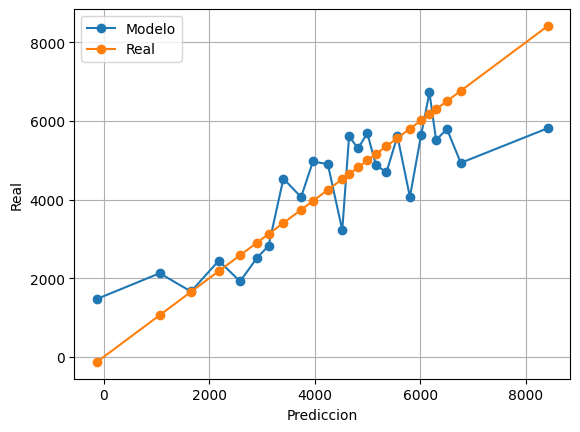

In [130]:
calibracion(predicciones_poly3, y_test, 25)

In [131]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones': predicciones,
        'y': y
    })
    
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False) + 1
    grouped = df_calibracion.groupby('bins').mean()
    
    plt.plot(grouped.predicciones, grouped.y, label="Modelo", marker="o")
    plt.plot(grouped.predicciones, grouped.predicciones, label="Real", marker="o")
    
    # Ajuste de regresión lineal
    lin_reg = LinearRegression()
    lin_reg.fit(grouped.predicciones.values.reshape(-1, 1), grouped.y)
    y_pred_lin = lin_reg.predict(grouped.predicciones.values.reshape(-1, 1))
    plt.plot(grouped.predicciones, y_pred_lin, label="Regresión Lineal", linestyle='--')
    
    # Ajuste de regresión polinomial de grado 2
    poly2 = PolynomialFeatures(degree=2)
    X_poly2 = poly2.fit_transform(grouped.predicciones.values.reshape(-1, 1))
    lin_reg2 = LinearRegression()
    lin_reg2.fit(X_poly2, grouped.y)
    y_pred_poly2 = lin_reg2.predict(X_poly2)
    plt.plot(grouped.predicciones, y_pred_poly2, label="Regresión Polinomial Grado 2", linestyle='--')
    
    # Ajuste de regresión polinomial de grado 3
    poly3 = PolynomialFeatures(degree=3)
    X_poly3 = poly3.fit_transform(grouped.predicciones.values.reshape(-1, 1))
    lin_reg3 = LinearRegression()
    lin_reg3.fit(X_poly3, grouped.y)
    y_pred_poly3 = lin_reg3.predict(X_poly3)
    plt.plot(grouped.predicciones, y_pred_poly3, label="Regresión Polinomial Grado 3", linestyle='--')
    
    plt.grid()
    plt.legend()
    plt.xlabel("Prediccion")
    plt.ylabel("Real")
    plt.show()

In [149]:
print('R^2 Regresión Lineal: ',r2_score(y_pred=predicciones_lineal, y_true=y_test))
print('R^2 Polinomio de grado 2: ',r2_score(y_pred=predicciones_poly2, y_true=y_test))
print('R^2 Polinomio de grado 3: ',r2_score(y_pred=predicciones_poly3, y_true=y_test))


R^2 Regresión Lineal:  0.5562077099859047
R^2 Polinomio de grado 2:  0.5653434988020116
R^2 Polinomio de grado 3:  0.29393333930559096


### CONCLUSIÓN

El mejor $ R^2 $ lo consigue la regresión polinómica de grado dos con Lasso, con un valor de 0.5653, que es el más alto de todos. En cambio, la regresión de grado tres hace que el $ R^2 $ baje bastante, lo que podría indicar que el modelo se ajusta demasiado a los datos y pierde precisión en nuevas predicciones.

# 2)

simula un AB test para las variables de holiday y workingday

Obten el score Z, intervalos de confianza y p value

¿Qué tan importante y significativo es para la renta de bicicletas estos dos eventos?

Calcular a mano y con el paquete de statsmodel 

In [132]:
import numpy as np
from scipy import stats


def AB_test(test, control):
    # Mu
    mu_test= test.mean()
    mu_control= control.mean()

    # SE
    se_test= test.sem()
    se_control= control.sem()
    # Differences
    mu_diff= mu_control - mu_test
    se_diff= np.sqrt((test.var() / len(test)) +( control.var() / len(control)))
    # Z score and p value 
    z= mu_diff / se_diff
    p_value= stats.norm.cdf(z)


    print(f"Variable test entre {mu_test - 2*se_test} y {mu_test + 2*se_test}")
    print(f"Variable control entre {mu_control - 2*se_control} y {mu_control + 2*se_control}")
    print(f"scores de Z : {z}")
    print(f"El p value es : {p_value}")

    return


### Comparando con Prueba AB

In [133]:
holiday = df[df['holiday'] == 1].cnt
workingday = df[df['workingday'] == 1].cnt

### Manualmente con las variables 'holiday' y 'workingday'

In [145]:
AB_test(holiday, workingday)

Variable test entre 2817.022512984841 y 4652.97748701516
Variable control entre 4416.809402672246 y 4752.830597327754
scores de Z : 1.8212528653593318
El p value es : 0.9657157861186356


### Paquete Statsmodel

In [ ]:
import statsmodels.formula.api as smf

result = smf.ols('cnt ~ holiday + workingday', data=df).fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4389.6857,133.413,32.903,0.000,4127.766,4651.605
holiday,-654.6857,442.480,-1.480,0.139,-1523.375,214.004
workingday,195.1343,158.980,1.227,0.220,-116.979,507.248


### CONCLUSIÓN

Esto sugiere que en días festivos se rentan más bicicletas que en días laborales. Sin embargo, el p-value es mayor en workingday que en holiday, lo que indica que la diferencia no es estadísticamente significativa. Como ambos valores están por encima de 0.05, no podemos concluir con certeza que el tipo de día influya en la cantidad de alquileres. En otras palabras, no hay suficiente evidencia estadística para afirmar que las bicicletas se rentan más en un tipo de día que en otro.